In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_curve
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm

import os

import torch

import warnings
warnings.filterwarnings("ignore") 

In [2]:
is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

print(device)

cuda


In [3]:
## Load original data
data_path = "C:/Users/GCU/Lending_club/Data_Analysis_lending-club/Dataset/train_dataset.csv"
data = pd.read_csv(data_path, low_memory=False)

data_1 = data[data['loan_status'] == 1]

In [4]:
fake_path = "C:/Users/GCU/Lending_club/Data_Analysis_lending-club/tablegan/samples/train/train_OI_11_00_fake.csv"
fake = pd.read_csv(fake_path)
fake['loan_status'] = 1

## Data 분석

In [5]:
data.describe()

,last_fico_range_high,mo_sin_old_rev_tl_op,int_rate,annual_inc,dti,zip_code,installment,fico_range_low,total_rev_hi_lim,avg_cur_bal,bc_open_to_buy,revol_util,revol_bal,total_acc,credit_history_years,loan_status
count,1.488611e+06,1.488611e+06,1.488611e+06,1.488611e+06,1.488611e+06,1.488611e+06,1.488611e+06,1.488611e+06,1.488611e+06,1.488611e+06,1.488611e+06,1.488611e+06,1.488611e+06,1.488611e+06,1.488611e+06,1.488611e+06
mean,6.789315e+02,1.806540e+02,1.316708e-01,7.739155e+04,1.856865e+01,5.133410e+02,4.402160e+02,6.976665e+02,3.382528e+04,1.357406e+04,1.106934e+04,5.046413e-01,1.628444e+04,2.461144e+01,1.630636e+01,1.950711e-01
std,8.248265e+01,9.403798e+01,4.828138e-02,1.266082e+05,1.308961e+01,3.116710e+02,2.668187e+02,3.270163e+01,3.456132e+04,1.613242e+04,1.605042e+04,2.477235e-01,2.230701e+04,1.205241e+01,7.590675e+00,3.962556e-01
min,0.000000e+00,1.000000e+00,5.310000e-02,0.000000e+00,-1.000000e+00,7.000000e+00,4.930000e+00,6.250000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
25%,6.290000e+02,1.180000e+02,9.490000e-02,4.600000e+04,1.183000e+01,2.330000e+02,2.469900e+02,6.700000e+02,1.470000e+04,3.191000e+03,1.731000e+03,3.160000e-01,5.850000e+03,1.600000e+01,1.100000e+01,0.000000e+00
50%,6.940000e+02,1.670000e+02,1.269000e-01,6.500000e+04,1.773000e+01,4.800000e+02,3.736300e+02,6.900000e+02,2.580000e+04,8.013000e+03,5.588000e+03,5.050000e-01,1.107600e+04,2.300000e+01,1.500000e+01,0.000000e+00
75%,7.390000e+02,2.270000e+02,1.599000e-01,9.200000e+04,2.429000e+01,8.020000e+02,5.849100e+02,7.150000e+02,4.120000e+04,1.826700e+04,1.313400e+04,6.950000e-01,1.977800e+04,3.100000e+01,2.000000e+01,0.000000e+00
max,8.500000e+02,9.090000e+02,3.099000e-01,1.100000e+08,9.990000e+02,9.990000e+02,1.719830e+03,8.450000e+02,9.999999e+06,9.580840e+05,6.059960e+05,8.923000e+00,2.568995e+06,1.760000e+02,8.300000e+01,1.000000e+00


In [6]:
data_1.describe()

,last_fico_range_high,mo_sin_old_rev_tl_op,int_rate,annual_inc,dti,zip_code,installment,fico_range_low,total_rev_hi_lim,avg_cur_bal,bc_open_to_buy,revol_util,revol_bal,total_acc,credit_history_years,loan_status
count,290385.000000,290385.000000,290385.000000,2.903850e+05,290385.000000,290385.000000,290385.000000,290385.000000,2.903850e+05,290385.000000,290385.000000,290385.000000,2.903850e+05,290385.000000,290385.000000,290385.0
mean,570.513697,170.771984,0.156564,7.205912e+04,20.262582,505.722386,472.827881,689.661312,3.007388e+04,11168.481880,8686.529981,0.529467,1.526658e+04,24.230091,15.735107,1.0
std,55.708222,94.701712,0.050233,2.159134e+05,13.963821,309.564146,268.404487,27.311029,2.864216e+04,13483.562844,13058.068718,0.242278,1.892493e+04,12.170458,7.572991,0.0
min,0.000000,1.000000,0.053100,0.000000e+00,0.000000,7.000000,21.620000,660.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,2.000000,3.000000,1.0
25%,524.000000,108.000000,0.120500,4.400000e+04,13.290000,229.000000,277.480000,670.000000,1.360000e+04,2828.000000,1360.000000,0.350000,5.843000e+03,15.000000,11.000000,1.0
50%,564.000000,155.000000,0.149900,6.000000e+04,19.600000,462.000000,407.360000,685.000000,2.340000e+04,6028.000000,4324.000000,0.534000,1.095300e+04,22.000000,14.000000,1.0
75%,604.000000,215.000000,0.185500,8.500000e+04,26.310000,799.000000,621.180000,705.000000,3.680000e+04,14539.000000,11065.920936,0.715000,1.899800e+04,31.000000,19.000000,1.0
max,850.000000,842.000000,0.309900,1.100000e+08,999.000000,999.000000,1717.630000,845.000000,1.998700e+06,391669.000000,447887.000000,3.666000,1.746716e+06,176.000000,83.000000,1.0


In [7]:
fake.describe()

,last_fico_range_high,mo_sin_old_rev_tl_op,int_rate,annual_inc,dti,zip_code,installment,fico_range_low,total_rev_hi_lim,avg_cur_bal,bc_open_to_buy,revol_util,revol_bal,total_acc,credit_history_years,loan_status
count,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.0
mean,566.737333,168.829416,0.156591,81969.180700,21.520608,504.303397,474.716145,693.897372,32869.283740,10699.238808,8571.668529,0.520088,15191.367654,24.048742,15.765286,1.0
std,55.290621,95.142960,0.049031,62595.100085,9.543976,314.741144,264.107725,27.398070,27566.570441,12622.248858,12637.003778,0.239842,15798.348573,12.162327,7.609162,0.0
min,499.000000,2.000000,0.054200,50.000000,0.230000,10.000000,22.790000,660.000000,1100.000000,87.000000,47.000000,0.001000,44.000000,3.000000,4.000000,1.0
25%,519.000000,101.000000,0.122900,34528.000000,15.130000,222.000000,282.780000,675.000000,16650.000000,3121.000000,1854.000000,0.341000,6838.000000,15.000000,11.000000,1.0
50%,559.000000,153.000000,0.150100,66306.000000,20.510000,462.000000,418.390000,690.000000,25200.000000,5818.000000,3832.000000,0.524000,11543.000000,22.000000,14.000000,1.0
75%,604.000000,214.000000,0.184900,113868.000000,26.520000,826.000000,622.290000,705.000000,39585.000000,13582.000000,9636.000000,0.707000,18713.000000,31.000000,19.000000,1.0
max,809.000000,692.000000,0.309900,546000.000000,144.300000,998.000000,1664.570000,840.000000,741600.000000,248688.000000,267489.000000,1.250000,654134.000000,113.000000,67.000000,1.0


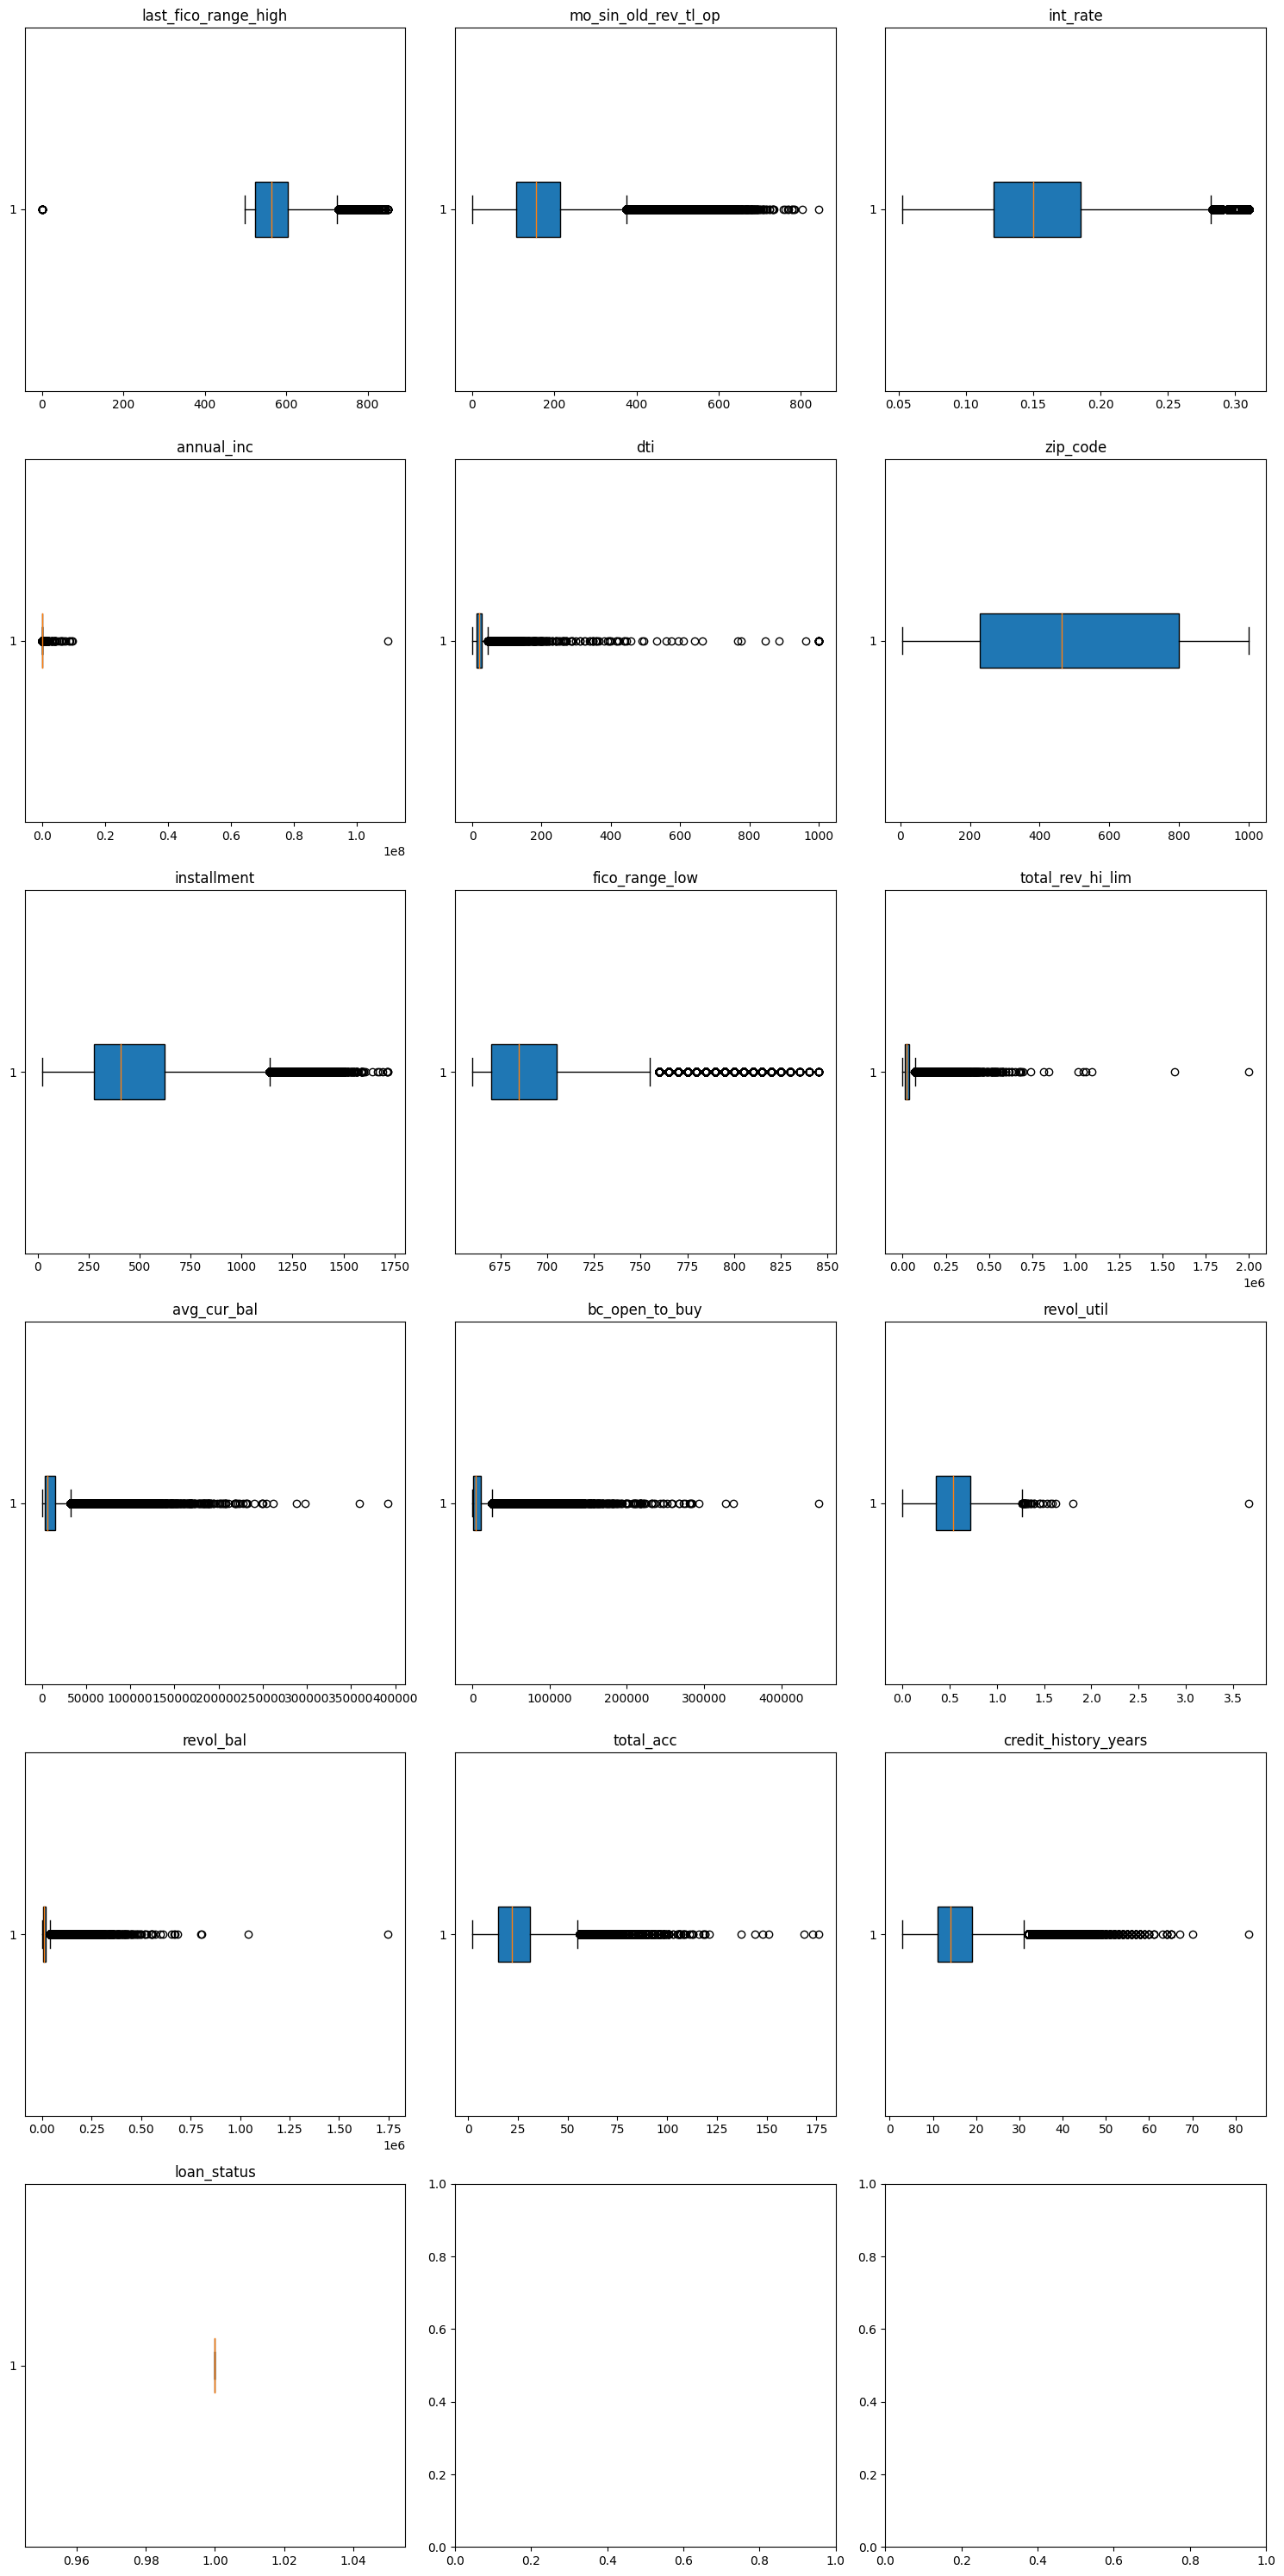

In [8]:
## data Class 1 Correlation
numerical_columns = data_1.select_dtypes(include=[np.number]).columns

# 🔹 Boxplot 시각화 (이상치 확인)
fig, axes = plt.subplots(nrows=len(numerical_columns)//3 + 1, ncols=3, figsize=(15, 5 * (len(numerical_columns)//3 + 1)))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    axes[i].boxplot(data_1[col].dropna(), vert=False, patch_artist=True)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

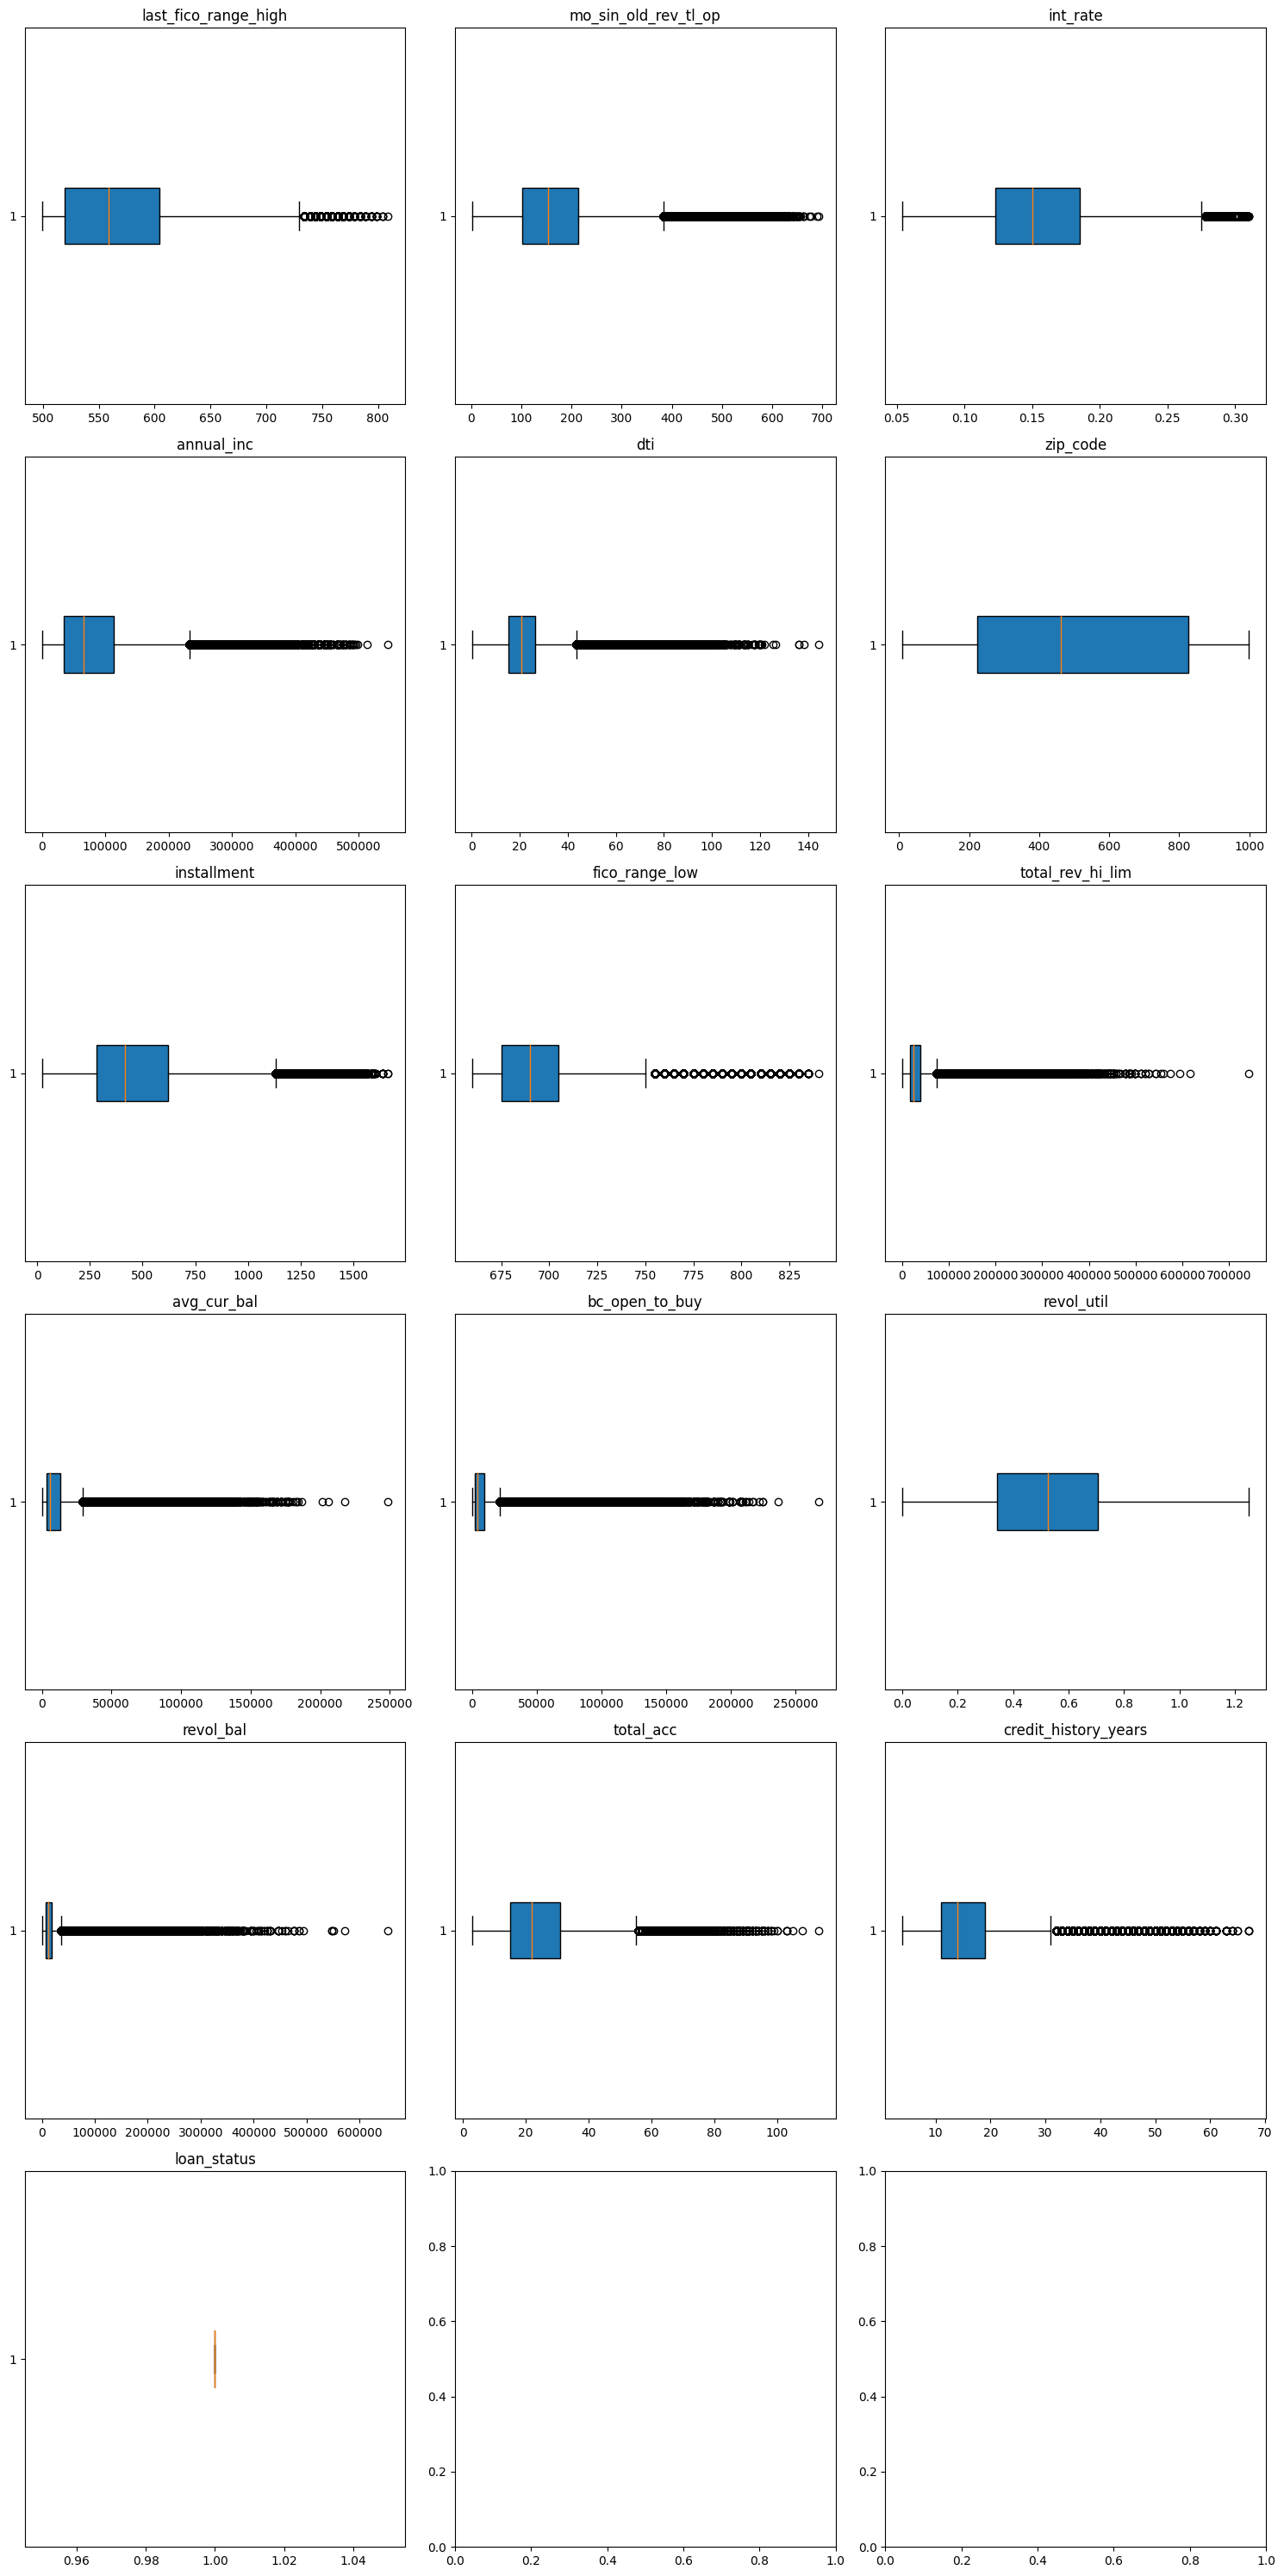

In [9]:
## data Class 1 Correlation
numerical_columns = fake.select_dtypes(include=[np.number]).columns

# 🔹 Boxplot 시각화 (이상치 확인)
fig, axes = plt.subplots(nrows=len(numerical_columns)//3 + 1, ncols=3, figsize=(15, 5 * (len(numerical_columns)//3 + 1)))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    axes[i].boxplot(fake[col].dropna(), vert=False, patch_artist=True)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

## Fake data Original data histplot 비교

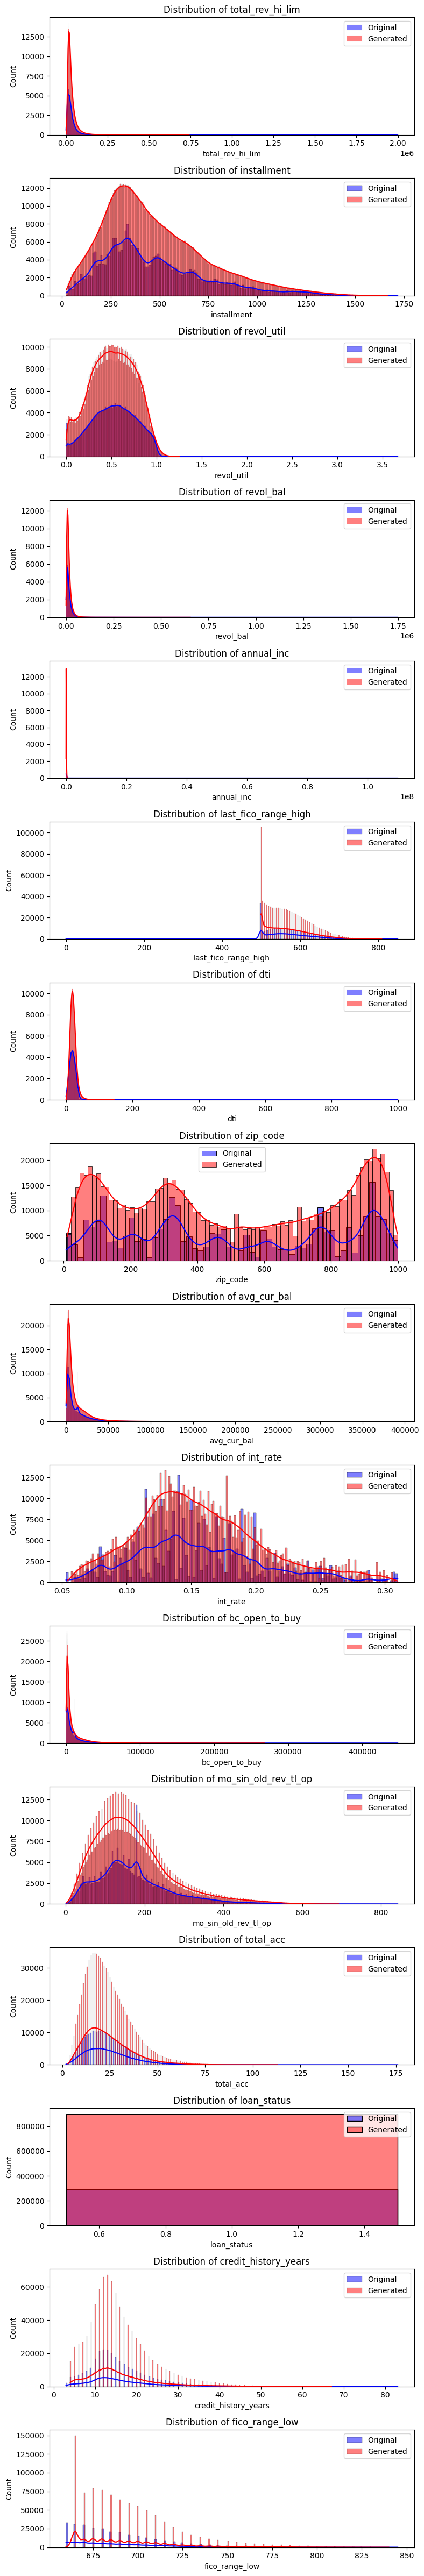

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# 원본 데이터와 TableGAN 생성 데이터 불러오기
# 원본 데이터: original_df
# TableGAN이 생성한 데이터: generated_df

# 공통 feature 선택 (혹시 컬럼이 다를 수도 있으니)
common_features = list(set(data.columns) & set(fake.columns))
original_df = data_1[common_features]
generated_df = fake[common_features]

# ------------------------------
# 1️⃣ 히스토그램 비교 (각 feature 분포)
# ------------------------------
num_features = len(common_features)
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(8, num_features * 3))

for i, feature in enumerate(common_features):
    sns.histplot(original_df[feature], color='blue', label='Original', kde=True, ax=axes[i], alpha=0.5)
    sns.histplot(generated_df[feature], color='red', label='Generated', kde=True, ax=axes[i], alpha=0.5)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].legend()

plt.tight_layout()
plt.show()